In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import layers

from keras.datasets import mnist

import matplotlib.pyplot as plt



Split the imported dataset into training and test data. Preprocess (reshape and normalize) the dataset. Print out the shapes of the resulting tensors.

In [4]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)

print("Training data shape:\n", train_data.shape, "\n")
print("Test data shape:\n", test_data.shape, "\n")
 
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
train_data /= 255 
test_data /= 255

#train_labels = keras.utils.to_categorical(train_labels, 10)
#test_labels = keras.utils.to_categorical(test_labels, 10)

#print("Training labels shape:\n", train_labels.shape, "\n")
#print("Test labels shape:\n", test_labels.shape)


Training data shape:
 (60000, 28, 28, 1) 

Test data shape:
 (10000, 28, 28, 1) 



Define the CNN-Autoencoder (CAE) model. Source: Tzoreff, Elad & Kogan, Olga & Choukroun, Yoni. (2018). Deep Discriminative Latent Space for Clustering.

In [5]:
model = keras.Sequential()
 
#1st convolution layer
model.add(layers.Conv2D(6, (5, 5) 
, padding='same', input_shape=(28,28,1)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
 
#2nd convolution layer
model.add(layers.Conv2D(16,(5, 5), padding='same')) 
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), padding='same'))
 
#here compressed version
 
#3rd convolution layer
model.add(layers.Conv2D(16,(5, 5), padding='same')) 
model.add(layers.Activation('relu'))
model.add(layers.UpSampling2D((2, 2)))
 
#4rd convolution layer
model.add(layers.Conv2D(6,(5, 5), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.UpSampling2D((2, 2)))
 
model.add(layers.Conv2D(1,(5, 5), padding='same'))
model.add(layers.Activation('sigmoid'))

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 activation_5 (Activation)   (None, 28, 28, 6)         0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 activation_6 (Activation)   (None, 14, 14, 16)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                 

Compile and train the previously defined architecture on the preprocessed dataset.

In [8]:
model.compile(optimizer='adadelta', loss='binary_crossentropy')
model.fit(train_data, train_data , batch_size=1, epochs=2, validation_data=(test_data, test_data)) #Selbstreferenzierung von train_data zwei mal, weil die Aufgabe des Autoencoders eine Rekonstruktion der Eingangsdaten ist
#model.save('C:/Users/AL/Desktop/Machine Learning II Thema 2/model_mnist.keras')


Epoch 1/2
60000/60000 [==============================] - 371s 6ms/step - loss: 0.1632 - val_loss: 0.1425
Epoch 2/2
60000/60000 [==============================] - 916s 15ms/step - loss: 0.1321 - val_loss: 0.1228


Plot 5 random input-images to be ran through the CAE aswell as the results.

313/313 [==============================] - 13s 39ms/step


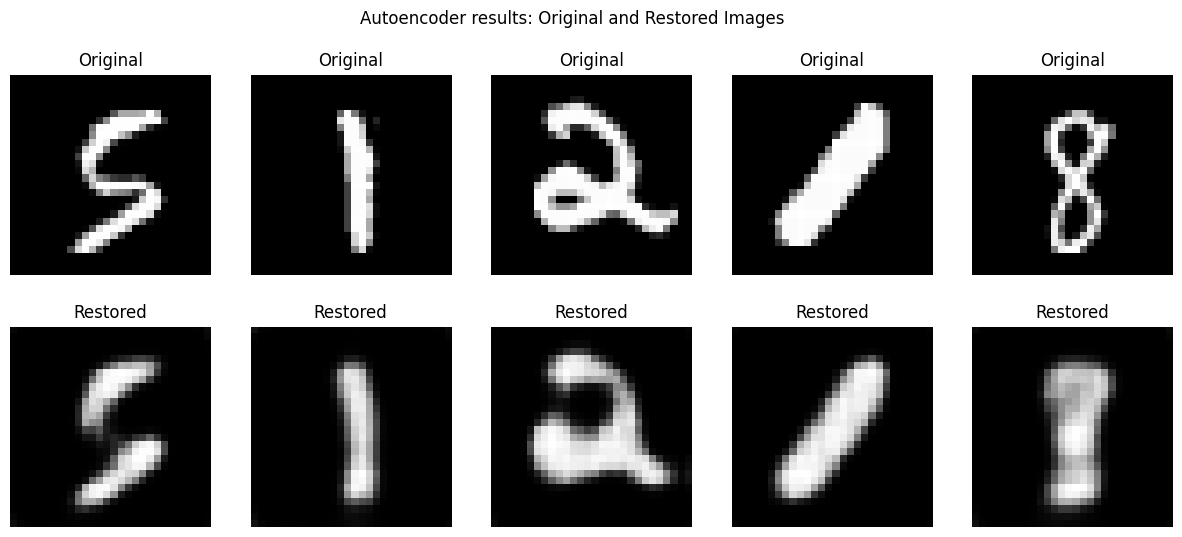

In [9]:
num_samples = test_data.shape[0]
indices = np.arange(num_samples)
np.random.shuffle(indices)

restored_imgs = model.predict(test_data)

# Create a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Autoencoder results: Original and Restored Images')

for i in range(5):
    random_index = indices[i]

    # Original images
    axes[0, i].imshow(test_data[random_index], cmap='gray')
    axes[0, i].axis('off')  # Hide axes
    axes[0, i].set_title('Original')

    # Restored images
    axes[1, i].imshow(restored_imgs[random_index], cmap='gray')
    axes[1, i].axis('off')  # Hide axes
    axes[1, i].set_title('Restored')

plt.show()